💈 Introduction aux réseaux de neurones artificiels



## Preamble



### Imports



In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from seaborn.relational import lineplot
import os
from cycler import cycler
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from kerastuner import HyperModel, BayesianOptimization

from sklearn.metrics import r2_score

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.datasets import boston_housing

print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.7.0


### Functions



In [2]:
# Display all
def display_all(df):
    with pd.option_context("display.max_rows", 100, "display.max_columns", 20): 
        display(df)

### Seaborn



In [3]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

## Data Loading



### Load Data



In [4]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data(test_split=0.2, seed=0)
x_train.shape, x_test.shape

((404, 13), (102, 13))

### Feature Scaling



In [5]:
normalizer = Normalization(axis=-1)
normalizer.adapt(np.array(x_train))

Metal device set to: Apple M1


2022-01-19 14:50:07.488565: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-19 14:50:07.488942: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-01-19 14:50:07.540275: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-01-19 14:50:07.600312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-19 14:50:07.613096: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [6]:
print(normalizer.mean.numpy())

[[3.6793318e+00 1.1095297e+01 1.1112575e+01 6.9306932e-02 5.5319214e-01
  6.2696676e+00 6.8315590e+01 3.8276019e+00 9.4851494e+00 4.0628955e+02
  1.8432674e+01 3.5619443e+02 1.2653491e+01]]


## Baseline



In [7]:
def build_and_compile_model(norm):
  model = Sequential([
      norm,
      Dense(8, activation='relu', input_shape=(x_train.shape[1],)),
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(1)
  ])

  model.compile(loss='mean_squared_error',
                metrics=['mse'],
                optimizer='rmsprop')
  return model

In [8]:
model = build_and_compile_model(normalizer)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 300
Trainable params: 273
Non-trainable params: 27
_________________________________________________________

In [9]:
%%time
history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
 1/11 [=>............................] - ETA: 3s - loss: 737.1583 - mse: 737.1583

2022-01-19 14:50:08.141828: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 1s 19ms/step - loss: 545.8723 - mse: 545.8723 - val_loss: 608.4645 - val_mse: 608.4645
Epoch 2/100
11/11 [==============================] - 0s 8ms/step - loss: 536.8960 - mse: 536.8960 - val_loss: 598.9455 - val_mse: 598.9455
Epoch 3/100
 9/11 [=======================>......] - ETA: 0s - loss: 545.6479 - mse: 545.6479

2022-01-19 14:50:08.477811: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 0s 9ms/step - loss: 528.6399 - mse: 528.6399 - val_loss: 589.1094 - val_mse: 589.1094
Epoch 4/100
11/11 [==============================] - 0s 9ms/step - loss: 520.3022 - mse: 520.3022 - val_loss: 579.3937 - val_mse: 579.3937
Epoch 5/100
11/11 [==============================] - 0s 9ms/step - loss: 510.2783 - mse: 510.2783 - val_loss: 568.5173 - val_mse: 568.5173
Epoch 6/100
11/11 [==============================] - 0s 11ms/step - loss: 501.0330 - mse: 501.0330 - val_loss: 557.8265 - val_mse: 557.8265
Epoch 7/100
11/11 [==============================] - 0s 9ms/step - loss: 491.0002 - mse: 491.0002 - val_loss: 546.6659 - val_mse: 546.6659
Epoch 8/100
11/11 [==============================] - 0s 8ms/step - loss: 481.1593 - mse: 481.1593 - val_loss: 534.2504 - val_mse: 534.2504
Epoch 9/100
11/11 [==============================] - 0s 9ms/step - loss: 469.8463 - mse: 469.8463 - val_loss: 521.6204 - val_mse: 521.6204
Epoch 10/100
11/11 [==================

11/11 [==============================] - 0s 8ms/step - loss: 30.0090 - mse: 30.0090 - val_loss: 40.5763 - val_mse: 40.5763
Epoch 63/100
11/11 [==============================] - 0s 8ms/step - loss: 33.2769 - mse: 33.2769 - val_loss: 40.0990 - val_mse: 40.0990
Epoch 64/100
11/11 [==============================] - 0s 8ms/step - loss: 31.5338 - mse: 31.5338 - val_loss: 39.0529 - val_mse: 39.0529
Epoch 65/100
11/11 [==============================] - 0s 8ms/step - loss: 30.8007 - mse: 30.8007 - val_loss: 38.7111 - val_mse: 38.7111
Epoch 66/100
11/11 [==============================] - 0s 8ms/step - loss: 27.6930 - mse: 27.6930 - val_loss: 37.7864 - val_mse: 37.7864
Epoch 67/100
11/11 [==============================] - 0s 8ms/step - loss: 28.8851 - mse: 28.8851 - val_loss: 36.8875 - val_mse: 36.8875
Epoch 68/100
11/11 [==============================] - 0s 8ms/step - loss: 33.2890 - mse: 33.2890 - val_loss: 36.1385 - val_mse: 36.1385
Epoch 69/100
11/11 [==============================] - 0s 9ms/

In [10]:
#history.params
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

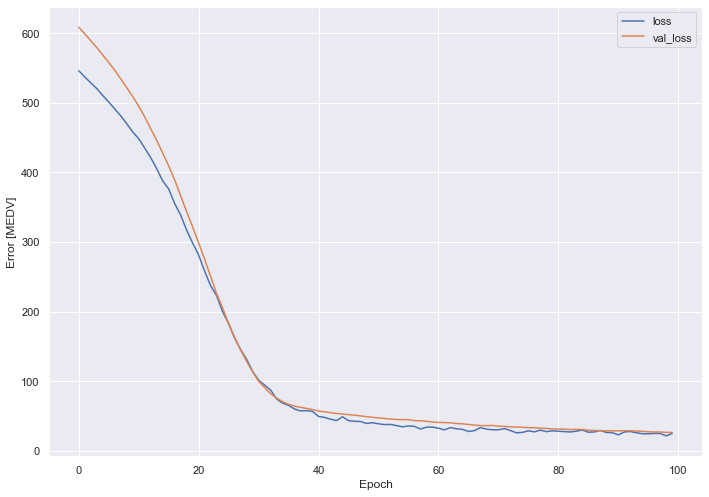

In [11]:
def plot_fit(history, metric):
  plt.plot(history.history[f'{metric}'], label=f'{metric}')
  plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MEDV]')
  plt.legend()
  plt.grid(True)
  
plot_fit(history, 'loss')

## Tuning Hyperparameters



In [12]:
class RegressionHyperModel(HyperModel):
    def __init__(self, input_shape, norm):
        self.input_shape = input_shape
        self.norm = norm
        
    def build(self, hp):
        model = Sequential()

        model.add(
            self.norm
        )

        model.add(
            Dense(
                units=hp.Int('units_1', 8, 64, 4, default=8),
                activation=hp.Choice(
                    'dense_activation_1',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu'),
                input_shape=self.input_shape
            )
        )
        
        model.add(
            Dense(
                units=hp.Int('units_2', 16, 64, 4, default=16),
                activation=hp.Choice(
                    'dense_activation_2',
                    values=['relu', 'tanh', 'sigmoid'],
                    default='relu')
            )
        )
        
        model.add(
            Dropout(
                hp.Float(
                    'dropout',
                    min_value=0.0,
                    max_value=0.1,
                    default=0.005,
                    step=0.01)
            )
        )
        
        model.add(Dense(1))

        lr = hp.Choice('learning_rate',
            values=[1e-1, 1e-2, 1e-3])
        opt = Adam(learning_rate=lr)

        model.compile(
            optimizer=opt, loss='mse', metrics=['mse']
        )

        return model

In [13]:
input_shape = (x_train.shape[1],)
hypermodel = RegressionHyperModel(input_shape, normalizer)

In [14]:
%%time
tuner_bo = BayesianOptimization(
    hypermodel,
    objective='mse',
    max_trials=10,
    seed=0,
    executions_per_trial=2,
    directory='model/kt',
    project_name='boston'
)

tuner_bo.search(x_train, y_train, epochs=20, validation_split=0.2, verbose=0)
best_model = tuner_bo.get_best_models(num_models=1)[0]

INFO:tensorflow:Reloading Oracle from existing project model/kt/boston/oracle.json
INFO:tensorflow:Reloading Tuner from model/kt/boston/tuner0.json
INFO:tensorflow:Oracle triggered exit
CPU times: user 242 ms, sys: 43.4 ms, total: 285 ms
Wall time: 177 ms


In [15]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,148
Trainable params: 5,121
Non-trainable params: 27
_____________________________________________________

In [16]:
# Get the optimal hyperparameters
best_hps=tuner_bo.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units_1')} and the optimal activation is {best_hps.get('dense_activation_1')}.
The optimal number of units in the second densely-connected
layer is {best_hps.get('units_2')} and the optimal activation is {best_hps.get('dense_activation_2')}.
The learning rate is {best_hps.get('learning_rate')}.
And the dropout is {best_hps.get('dropout')}
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 64 and the optimal activation is relu.
The optimal number of units in the second densely-connected
layer is 64 and the optimal activation is relu.
The learning rate is 0.1.
And the dropout is 0.05



-   Finally we fit our best model:



In [17]:
checkpoint_path = "model/boston/checkpoint"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              monitor='val_loss',
                              mode='min',
                              save_weights_only=True,
                              save_freq=50,
                              save_best_only=True,
                              verbose=1)

es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = best_model.fit(x_train, 
                         y_train,
                         epochs=1500,
                         batch_size=len(y_train),
                         validation_split=0.2,
                         callbacks=[cp_callback, es_callback]
)

Epoch 1/1500
1/1 [==============================] - 0s 274ms/step - loss: 19.2888 - mse: 19.2888 - val_loss: 28.1070 - val_mse: 28.1070
Epoch 2/1500
1/1 [==============================] - ETA: 0s - loss: 18.9235 - mse: 18.9235

2022-01-19 14:50:18.170731: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-19 14:50:18.319038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 20ms/step - loss: 18.9235 - mse: 18.9235 - val_loss: 28.0570 - val_mse: 28.0570
Epoch 3/1500
1/1 [==============================] - 0s 28ms/step - loss: 20.4106 - mse: 20.4106 - val_loss: 28.0043 - val_mse: 28.0043
Epoch 4/1500
1/1 [==============================] - 0s 46ms/step - loss: 19.4394 - mse: 19.4394 - val_loss: 27.9485 - val_mse: 27.9485
Epoch 5/1500
1/1 [==============================] - 0s 26ms/step - loss: 19.0758 - mse: 19.0758 - val_loss: 27.8896 - val_mse: 27.8896
Epoch 6/1500
1/1 [==============================] - 0s 21ms/step - loss: 18.7369 - mse: 18.7369 - val_loss: 27.8292 - val_mse: 27.8292
Epoch 7/1500
1/1 [==============================] - 0s 32ms/step - loss: 19.2318 - mse: 19.2318 - val_loss: 27.7670 - val_mse: 27.7670
Epoch 8/1500
1/1 [==============================] - 0s 31ms/step - loss: 19.5016 - mse: 19.5016 - val_loss: 27.7026 - val_mse: 27.7026
Epoch 9/1500
1/1 [==============================] - 0s 33ms/step - l

Epoch 62/1500
1/1 [==============================] - 0s 19ms/step - loss: 16.7729 - mse: 16.7729 - val_loss: 24.7037 - val_mse: 24.7037
Epoch 63/1500
1/1 [==============================] - 0s 19ms/step - loss: 17.2494 - mse: 17.2494 - val_loss: 24.6545 - val_mse: 24.6545
Epoch 64/1500
1/1 [==============================] - 0s 20ms/step - loss: 17.4850 - mse: 17.4850 - val_loss: 24.6049 - val_mse: 24.6049
Epoch 65/1500
1/1 [==============================] - 0s 19ms/step - loss: 16.6281 - mse: 16.6281 - val_loss: 24.5573 - val_mse: 24.5573
Epoch 66/1500
1/1 [==============================] - 0s 20ms/step - loss: 16.7171 - mse: 16.7171 - val_loss: 24.5116 - val_mse: 24.5116
Epoch 67/1500
1/1 [==============================] - 0s 20ms/step - loss: 16.9312 - mse: 16.9312 - val_loss: 24.4667 - val_mse: 24.4667
Epoch 68/1500
1/1 [==============================] - 0s 20ms/step - loss: 16.2379 - mse: 16.2379 - val_loss: 24.4223 - val_mse: 24.4223
Epoch 69/1500
1/1 [=============================

1/1 [==============================] - 0s 21ms/step - loss: 15.7957 - mse: 15.7957 - val_loss: 22.2208 - val_mse: 22.2208
Epoch 122/1500
1/1 [==============================] - 0s 20ms/step - loss: 15.6085 - mse: 15.6085 - val_loss: 22.1870 - val_mse: 22.1870
Epoch 123/1500
1/1 [==============================] - 0s 21ms/step - loss: 15.2896 - mse: 15.2896 - val_loss: 22.1530 - val_mse: 22.1530
Epoch 124/1500
1/1 [==============================] - 0s 20ms/step - loss: 15.4702 - mse: 15.4702 - val_loss: 22.1184 - val_mse: 22.1184
Epoch 125/1500
1/1 [==============================] - 0s 19ms/step - loss: 15.6899 - mse: 15.6899 - val_loss: 22.0848 - val_mse: 22.0848
Epoch 126/1500
1/1 [==============================] - 0s 20ms/step - loss: 15.5183 - mse: 15.5183 - val_loss: 22.0488 - val_mse: 22.0488
Epoch 127/1500
1/1 [==============================] - 0s 23ms/step - loss: 16.3150 - mse: 16.3150 - val_loss: 22.0134 - val_mse: 22.0134
Epoch 128/1500
1/1 [==============================] - 0s

1/1 [==============================] - 0s 18ms/step - loss: 14.1600 - mse: 14.1600 - val_loss: 20.4568 - val_mse: 20.4568
Epoch 181/1500
1/1 [==============================] - 0s 19ms/step - loss: 15.1182 - mse: 15.1182 - val_loss: 20.4335 - val_mse: 20.4335
Epoch 182/1500
1/1 [==============================] - 0s 20ms/step - loss: 14.5665 - mse: 14.5665 - val_loss: 20.4073 - val_mse: 20.4073
Epoch 183/1500
1/1 [==============================] - 0s 21ms/step - loss: 14.0640 - mse: 14.0640 - val_loss: 20.3825 - val_mse: 20.3825
Epoch 184/1500
1/1 [==============================] - 0s 20ms/step - loss: 14.0594 - mse: 14.0594 - val_loss: 20.3616 - val_mse: 20.3616
Epoch 185/1500
1/1 [==============================] - 0s 18ms/step - loss: 14.6026 - mse: 14.6026 - val_loss: 20.3385 - val_mse: 20.3385
Epoch 186/1500
1/1 [==============================] - 0s 19ms/step - loss: 14.7379 - mse: 14.7379 - val_loss: 20.3112 - val_mse: 20.3112
Epoch 187/1500
1/1 [==============================] - 0s

1/1 [==============================] - 0s 30ms/step - loss: 13.8512 - mse: 13.8512 - val_loss: 19.2802 - val_mse: 19.2802
Epoch 240/1500
1/1 [==============================] - 0s 22ms/step - loss: 13.4184 - mse: 13.4184 - val_loss: 19.2665 - val_mse: 19.2665
Epoch 241/1500
1/1 [==============================] - 0s 24ms/step - loss: 13.6914 - mse: 13.6914 - val_loss: 19.2497 - val_mse: 19.2497
Epoch 242/1500
1/1 [==============================] - 0s 18ms/step - loss: 14.0735 - mse: 14.0735 - val_loss: 19.2323 - val_mse: 19.2323
Epoch 243/1500
1/1 [==============================] - 0s 20ms/step - loss: 13.2854 - mse: 13.2854 - val_loss: 19.2143 - val_mse: 19.2143
Epoch 244/1500
1/1 [==============================] - 0s 19ms/step - loss: 12.9506 - mse: 12.9506 - val_loss: 19.1938 - val_mse: 19.1938
Epoch 245/1500
1/1 [==============================] - 0s 21ms/step - loss: 13.6932 - mse: 13.6932 - val_loss: 19.1746 - val_mse: 19.1746
Epoch 246/1500
1/1 [==============================] - 0s

1/1 [==============================] - 0s 27ms/step - loss: 13.3933 - mse: 13.3933 - val_loss: 18.2318 - val_mse: 18.2318
Epoch 299/1500
1/1 [==============================] - 0s 30ms/step - loss: 12.5159 - mse: 12.5159 - val_loss: 18.2160 - val_mse: 18.2160
Epoch 300/1500
1/1 [==============================] - 0s 24ms/step - loss: 12.9486 - mse: 12.9486 - val_loss: 18.2013 - val_mse: 18.2013
Epoch 301/1500
1/1 [==============================] - 0s 21ms/step - loss: 12.9857 - mse: 12.9857 - val_loss: 18.1886 - val_mse: 18.1886
Epoch 302/1500
1/1 [==============================] - 0s 28ms/step - loss: 12.9935 - mse: 12.9935 - val_loss: 18.1724 - val_mse: 18.1724
Epoch 303/1500
1/1 [==============================] - 0s 21ms/step - loss: 13.0082 - mse: 13.0082 - val_loss: 18.1608 - val_mse: 18.1608
Epoch 304/1500
1/1 [==============================] - 0s 21ms/step - loss: 13.0007 - mse: 13.0007 - val_loss: 18.1462 - val_mse: 18.1462
Epoch 305/1500
1/1 [==============================] - 0s

Epoch 357/1500
1/1 [==============================] - 0s 23ms/step - loss: 11.6994 - mse: 11.6994 - val_loss: 17.3527 - val_mse: 17.3527
Epoch 358/1500
1/1 [==============================] - 0s 21ms/step - loss: 12.1192 - mse: 12.1192 - val_loss: 17.3387 - val_mse: 17.3387
Epoch 359/1500
1/1 [==============================] - 0s 28ms/step - loss: 11.9929 - mse: 11.9929 - val_loss: 17.3211 - val_mse: 17.3211
Epoch 360/1500
1/1 [==============================] - 0s 24ms/step - loss: 12.0711 - mse: 12.0711 - val_loss: 17.3007 - val_mse: 17.3007
Epoch 361/1500
1/1 [==============================] - 0s 26ms/step - loss: 11.6032 - mse: 11.6032 - val_loss: 17.2816 - val_mse: 17.2816
Epoch 362/1500
1/1 [==============================] - 0s 19ms/step - loss: 12.0356 - mse: 12.0356 - val_loss: 17.2641 - val_mse: 17.2641
Epoch 363/1500
1/1 [==============================] - 0s 19ms/step - loss: 12.5254 - mse: 12.5254 - val_loss: 17.2486 - val_mse: 17.2486
Epoch 364/1500
1/1 [=====================

1/1 [==============================] - 0s 20ms/step - loss: 11.1783 - mse: 11.1783 - val_loss: 16.6814 - val_mse: 16.6814
Epoch 417/1500
1/1 [==============================] - 0s 19ms/step - loss: 11.6928 - mse: 11.6928 - val_loss: 16.6769 - val_mse: 16.6769
Epoch 418/1500
1/1 [==============================] - 0s 18ms/step - loss: 11.0019 - mse: 11.0019 - val_loss: 16.6692 - val_mse: 16.6692
Epoch 419/1500
1/1 [==============================] - 0s 23ms/step - loss: 11.1410 - mse: 11.1410 - val_loss: 16.6602 - val_mse: 16.6602
Epoch 420/1500
1/1 [==============================] - 0s 20ms/step - loss: 11.1959 - mse: 11.1959 - val_loss: 16.6462 - val_mse: 16.6462
Epoch 421/1500
1/1 [==============================] - 0s 22ms/step - loss: 11.5330 - mse: 11.5330 - val_loss: 16.6340 - val_mse: 16.6340
Epoch 422/1500
1/1 [==============================] - 0s 20ms/step - loss: 10.8880 - mse: 10.8880 - val_loss: 16.6222 - val_mse: 16.6222
Epoch 423/1500
1/1 [==============================] - 0s

1/1 [==============================] - 0s 20ms/step - loss: 11.2594 - mse: 11.2594 - val_loss: 16.0404 - val_mse: 16.0404
Epoch 476/1500
1/1 [==============================] - 0s 28ms/step - loss: 11.2160 - mse: 11.2160 - val_loss: 16.0199 - val_mse: 16.0199
Epoch 477/1500
1/1 [==============================] - 0s 31ms/step - loss: 11.2622 - mse: 11.2622 - val_loss: 15.9977 - val_mse: 15.9977
Epoch 478/1500
1/1 [==============================] - 0s 33ms/step - loss: 10.7390 - mse: 10.7390 - val_loss: 15.9839 - val_mse: 15.9839
Epoch 479/1500
1/1 [==============================] - 0s 30ms/step - loss: 10.2929 - mse: 10.2929 - val_loss: 15.9762 - val_mse: 15.9762
Epoch 480/1500
1/1 [==============================] - 0s 31ms/step - loss: 11.7172 - mse: 11.7172 - val_loss: 15.9737 - val_mse: 15.9737
Epoch 481/1500
1/1 [==============================] - 0s 31ms/step - loss: 10.5989 - mse: 10.5989 - val_loss: 15.9690 - val_mse: 15.9690
Epoch 482/1500
1/1 [==============================] - 0s

1/1 [==============================] - 0s 21ms/step - loss: 9.9423 - mse: 9.9423 - val_loss: 15.4255 - val_mse: 15.4255
Epoch 535/1500
1/1 [==============================] - 0s 19ms/step - loss: 10.3870 - mse: 10.3870 - val_loss: 15.4224 - val_mse: 15.4224
Epoch 536/1500
1/1 [==============================] - 0s 19ms/step - loss: 10.8955 - mse: 10.8955 - val_loss: 15.4194 - val_mse: 15.4194
Epoch 537/1500
1/1 [==============================] - 0s 20ms/step - loss: 9.9344 - mse: 9.9344 - val_loss: 15.4260 - val_mse: 15.4260
Epoch 538/1500
1/1 [==============================] - 0s 18ms/step - loss: 10.7730 - mse: 10.7730 - val_loss: 15.4271 - val_mse: 15.4271
Epoch 539/1500
1/1 [==============================] - 0s 19ms/step - loss: 11.3960 - mse: 11.3960 - val_loss: 15.4270 - val_mse: 15.4270
Epoch 540/1500
1/1 [==============================] - 0s 20ms/step - loss: 10.4547 - mse: 10.4547 - val_loss: 15.4259 - val_mse: 15.4259
Epoch 541/1500
1/1 [==============================] - 0s 21m

1/1 [==============================] - 0s 29ms/step - loss: 10.7450 - mse: 10.7450 - val_loss: 14.8902 - val_mse: 14.8902
Epoch 594/1500
1/1 [==============================] - 0s 32ms/step - loss: 9.5671 - mse: 9.5671 - val_loss: 14.8949 - val_mse: 14.8949
Epoch 595/1500
1/1 [==============================] - 0s 29ms/step - loss: 9.3369 - mse: 9.3369 - val_loss: 14.8983 - val_mse: 14.8983
Epoch 596/1500
1/1 [==============================] - 0s 22ms/step - loss: 9.6222 - mse: 9.6222 - val_loss: 14.8959 - val_mse: 14.8959
Epoch 597/1500
1/1 [==============================] - 0s 27ms/step - loss: 9.7358 - mse: 9.7358 - val_loss: 14.8922 - val_mse: 14.8922
Epoch 598/1500
1/1 [==============================] - 0s 29ms/step - loss: 9.7144 - mse: 9.7144 - val_loss: 14.8879 - val_mse: 14.8879
Epoch 599/1500
1/1 [==============================] - 0s 22ms/step - loss: 10.3549 - mse: 10.3549 - val_loss: 14.8855 - val_mse: 14.8855
Epoch 600/1500
1/1 [==============================] - 0s 27ms/step

1/1 [==============================] - 0s 28ms/step - loss: 9.1100 - mse: 9.1100 - val_loss: 14.3228 - val_mse: 14.3228
Epoch 653/1500
1/1 [==============================] - 0s 22ms/step - loss: 9.4559 - mse: 9.4559 - val_loss: 14.3057 - val_mse: 14.3057
Epoch 654/1500
1/1 [==============================] - 0s 19ms/step - loss: 9.7976 - mse: 9.7976 - val_loss: 14.2929 - val_mse: 14.2929
Epoch 655/1500
1/1 [==============================] - 0s 20ms/step - loss: 9.4838 - mse: 9.4838 - val_loss: 14.2806 - val_mse: 14.2806
Epoch 656/1500
1/1 [==============================] - 0s 20ms/step - loss: 8.9797 - mse: 8.9797 - val_loss: 14.2591 - val_mse: 14.2591
Epoch 657/1500
1/1 [==============================] - 0s 18ms/step - loss: 9.8176 - mse: 9.8176 - val_loss: 14.2371 - val_mse: 14.2371
Epoch 658/1500
1/1 [==============================] - 0s 18ms/step - loss: 9.3842 - mse: 9.3842 - val_loss: 14.2254 - val_mse: 14.2254
Epoch 659/1500
1/1 [==============================] - 0s 19ms/step - l

1/1 [==============================] - 0s 20ms/step - loss: 9.0781 - mse: 9.0781 - val_loss: 13.7490 - val_mse: 13.7490
Epoch 713/1500
1/1 [==============================] - 0s 18ms/step - loss: 9.2280 - mse: 9.2280 - val_loss: 13.7451 - val_mse: 13.7451
Epoch 714/1500
1/1 [==============================] - 0s 19ms/step - loss: 9.2222 - mse: 9.2222 - val_loss: 13.7402 - val_mse: 13.7402
Epoch 715/1500
1/1 [==============================] - 0s 20ms/step - loss: 9.7316 - mse: 9.7316 - val_loss: 13.7290 - val_mse: 13.7290
Epoch 716/1500
1/1 [==============================] - 0s 20ms/step - loss: 8.9333 - mse: 8.9333 - val_loss: 13.7238 - val_mse: 13.7238
Epoch 717/1500
1/1 [==============================] - 0s 23ms/step - loss: 9.7296 - mse: 9.7296 - val_loss: 13.7294 - val_mse: 13.7294
Epoch 718/1500
1/1 [==============================] - 0s 30ms/step - loss: 9.1941 - mse: 9.1941 - val_loss: 13.7391 - val_mse: 13.7391
Epoch 719/1500
1/1 [==============================] - 0s 30ms/step - l

1/1 [==============================] - 0s 20ms/step - loss: 9.0057 - mse: 9.0057 - val_loss: 13.3564 - val_mse: 13.3564
Epoch 773/1500
1/1 [==============================] - 0s 21ms/step - loss: 9.0827 - mse: 9.0827 - val_loss: 13.3490 - val_mse: 13.3490
Epoch 774/1500
1/1 [==============================] - 0s 22ms/step - loss: 8.6210 - mse: 8.6210 - val_loss: 13.3316 - val_mse: 13.3316
Epoch 775/1500
1/1 [==============================] - 0s 24ms/step - loss: 8.4763 - mse: 8.4763 - val_loss: 13.3131 - val_mse: 13.3131
Epoch 776/1500
1/1 [==============================] - 0s 20ms/step - loss: 8.8731 - mse: 8.8731 - val_loss: 13.2918 - val_mse: 13.2918
Epoch 777/1500
1/1 [==============================] - 0s 19ms/step - loss: 8.5314 - mse: 8.5314 - val_loss: 13.2785 - val_mse: 13.2785
Epoch 778/1500
1/1 [==============================] - 0s 26ms/step - loss: 8.8169 - mse: 8.8169 - val_loss: 13.2637 - val_mse: 13.2637
Epoch 779/1500
1/1 [==============================] - 0s 20ms/step - l

In [18]:
val_loss, val_mse = best_model.evaluate(x_train, y_train)
val_loss, val_mse

13/13 [==============================] - 0s 5ms/step - loss: 8.8406 - mse: 8.8406


(8.840563774108887, 8.840563774108887)

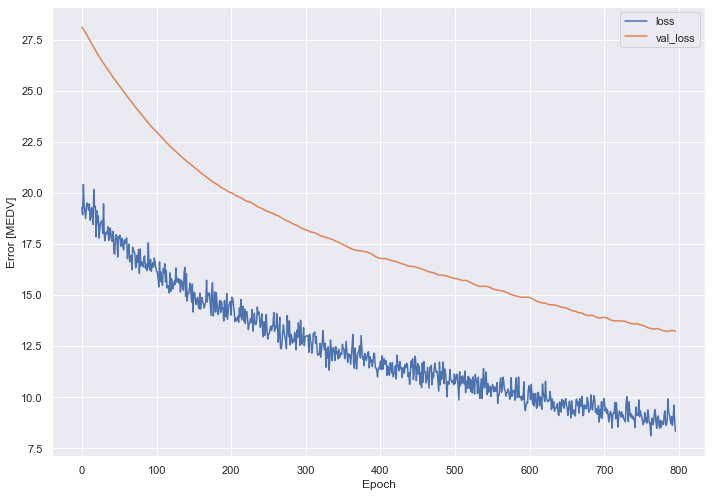

In [19]:
plot_fit(history, 'loss')

In [20]:
predictions = model.predict(x_test)
r2_score(y_test, predictions)

2022-01-19 14:50:37.742228: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


0.8422338149159552

## Save best model



In [21]:
best_model.save('model/boston')

2022-01-19 14:50:37.926541: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model/boston/assets


## Bibliography



### References:PROPERTIES:




[tfk.bib](tfk.bib)

